# Deep Learning Experiments
If you would like here is some structure for your experiments in a jupyter notebook. Here are some important keyboard shortcuts 
* shift + enter - run current cell and move to next cell
* ctrl + enter - run current cell 

## Dependencies

In [2]:
# if you need any other modules feel free to add them here
import sys
sys.path.append("..") 

from src.models import Digit_Classifier, Dog_Classifier_FC, Dog_Classifier_Conv
from src.run_model import run_model
from src.run_model import _test
from data.load_data import load_mnist_data
from data.my_dataset import MyDataset
from data.dogs import DogsDataset

import matplotlib.pyplot as plt
import numpy as np
import time
import csv
import os
os.chdir(r"C:\Users\seand\winter2022-hw6-neural-networks-sdchen6")





import torch
import torch.nn as nn
import torch.nn.functional as F

## MNIST

#### Cell for Spliting Data
Here I have given you an example of loading in a tarining dataset. Remember you need 4 differently sized datasets for this part of the experiment (experimenting trainingset size to see how it changes accuracy and training time). I have also given you the testing set you need, you won't need to make any other testing sets. 

In [3]:
# create 4 datasets of size {500, 1000, 1500, 2000} from MNIST
# to load the data need to use a pytorch Dataset object
# this line will return (train_features, test_features, train_targets, test_targets)
data_split500 = load_mnist_data(10, 1.0, 50)
training_set500 = MyDataset(data_split500[0], data_split500[2])

data_split1000 = load_mnist_data(10, 1.0, 100)
training_set1000  = MyDataset(data_split1000[0], data_split1000[2])

data_split1500 = load_mnist_data(10, 1.0, 150)
training_set1500 = MyDataset(data_split1500[0], data_split1500[2])

data_split2000 = load_mnist_data(10, 1.0, 200)
training_set2000 = MyDataset(data_split2000[0], data_split2000[2])

# testing set
data_split = load_mnist_data(10, 0, 1000)
testing_set = MyDataset(data_split[1], data_split[3])

#### Cell for Training
Here you need to train 4 models with training set sizes [500, 1000, 1500, 2000]. Track the training time & accuracy. 

***Optinal*** 

you can track your training time and accuracy by making a dictionary entry for the model ex.
```training_time.update({model_size:training_time})```

I've included the dictionary defintions in a cell below, if this method is confusing to you feel free to track any other way.


In [3]:
# Dicionaries to track metrics
# training time
training_time = {}
# training loss
training_loss = {}
# training accurary 
training_acc = {}
# testing loss 
# OPTIONAL
testing_loss = {}
# testing acc
testing_acc = {}


In [42]:
# HINT: To get the current time use: 
#     current_time = time.time()
model_size = []
training_time = []
acc = []

base_time = time.time()
net500 = Digit_Classifier()
model500, loss500, acc500 = run_model(net500,
                        n_epochs=100,
                        running_mode="train",
                        train_set= training_set500,
                        test_set= testing_set,
                        batch_size=10
                        )
current_time = time.time() - base_time
model_size.append(500)
training_time.append(current_time)

#accuracy
testloss500, testacc500 = run_model(model500,
                        n_epochs=100,
                        running_mode="test",
                        train_set= training_set500,
                        test_set= testing_set,
                        batch_size=10
                        )
acc.append(testacc500)



base_time = time.time()
net1000 = Digit_Classifier()
model1000, loss1000, acc1000 = run_model(net1000,
                        n_epochs=100,
                        running_mode="train",
                        train_set= training_set1000,
                        test_set= testing_set,
                        batch_size=10
                        )
current_time = time.time() - base_time
model_size.append(1000)
training_time.append(current_time)

#accuracy
testloss1000, testacc1000 = run_model(model1000,
                        n_epochs=100,
                        running_mode="test",
                        train_set= training_set1000,
                        test_set= testing_set,
                        batch_size=10
                        )
acc.append(testacc1000)

                    
base_time = time.time()
net1500 = Digit_Classifier()
model1500, loss1500, acc1500 = run_model(net1500,
                        n_epochs=100,
                        running_mode="train",
                        train_set= training_set1500,
                        test_set= testing_set,
                        batch_size=10
                        )
current_time = time.time() - base_time
model_size.append(1500)
training_time.append(current_time)

#accuracy
testloss1500, testacc1500 = run_model(model1500,
                        n_epochs=100,
                        running_mode="test",
                        train_set= training_set1500,
                        test_set= testing_set,
                        batch_size=10
                        )
acc.append(testacc1500)


base_time = time.time()
net2000 = Digit_Classifier()
model2000, loss2000, acc2000 = run_model(net2000,
                        n_epochs=100,
                        running_mode="train",
                        train_set= training_set2000,
                        test_set= testing_set,
                        batch_size=10
                        )
current_time = time.time() - base_time
model_size.append(2000)
training_time.append(current_time)

#accuracy
testloss2000, testacc2000 = run_model(model2000,
                        n_epochs=100,
                        running_mode="test",
                        train_set= training_set2000,
                        test_set= testing_set,
                        batch_size=10
                        )
acc.append(testacc2000)


print(model_size)
print(training_time)
print(acc)


[500, 1000, 1500, 2000]
[3.550936460494995, 6.933154344558716, 12.64883542060852, 17.71852469444275]
[82.7340823970033, 86.36363636363556, 87.60980592441214, 89.75485188968257]


### Graphs

#### Style
matplotlib has a lot of different styles which can be found here: 
https://matplotlib.org/3.2.2/gallery/style_sheets/style_sheets_reference.html

In [24]:
from matplotlib import style
style.use('fivethirtyeight')

#### Model Size vs Training Time

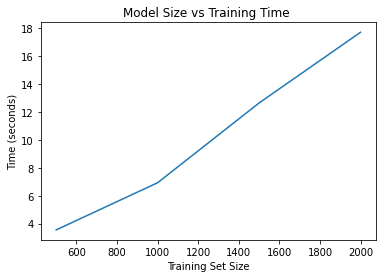

In [43]:
plt.title("Model Size vs Training Time ")
plt.xlabel('Training Set Size')
plt.ylabel('Time (seconds)')
plt.plot(model_size,training_time)
plt.show()

#### Model size Vs Accuracy

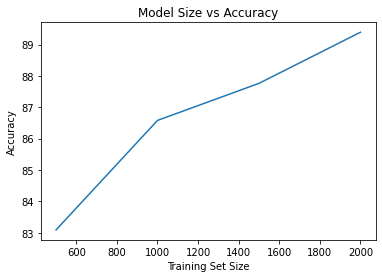

In [40]:
plt.title("Model Size vs Accuracy")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')

plt.plot(model_size,acc)
plt.show()

#### OPTIONAL Training loss

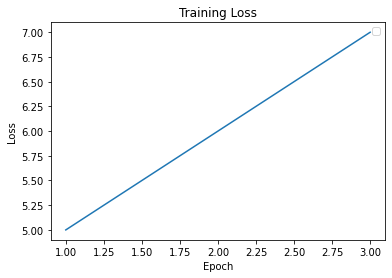

In [8]:
plt.legend(['500', '1000', '1500', '2000'], loc='upper right')
plt.title('Training Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot([1,2,3],[5,6,7])

## Exploring DogSet

#### Dogset CSV 
Explore breeds and trainingset vs testingset size using the included csv for DogSet

In [6]:
base_folder = r'C:\Users\seand\winter2022-hw6-neural-networks-sdchen6\data'
sub_folder = 'DogSet'
dataset_name = 'dogs.csv'
data_path = os.path.join(base_folder, sub_folder)

sizes = {'train':0, 'test':0, 'valid':0}
breeds = []

## Training a model on DogSet

#### Load the Data

In [8]:
dogset = DogsDataset(data_path)

dog_train_ex, dog_train_lab = dogset.get_train_examples()
sizes['train'] = len(dog_train_ex)
dog_test_ex, dog_test_lab = dogset.get_test_examples()
sizes['test'] = len(dog_test_ex)
dog_val_ex, dog_val_lab = dogset.get_validation_examples()
sizes['valid'] = len(dog_val_ex)


train_set = MyDataset(dog_train_ex, dog_train_lab)
test_set = MyDataset(dog_test_ex, dog_test_lab)
val_set = MyDataset(dog_val_ex, dog_val_lab)

print(sizes)


loading train...
loading valid...
loading test...
{'train': 7665, 'test': 555, 'valid': 2000}


#### Train the Model

In [24]:
#model = Dog_Classifier_FC()
#model, loss, acc = run_model()
dog_class = Dog_Classifier_FC()


dog_model, loss, acc = run_model(dog_class,running_mode='train', train_set=train_set, test_set = test_set, valid_set=val_set,batch_size=10,
        n_epochs=100, learning_rate=1e-5)



print(loss)
print(acc)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
{'train': [2.308766332412481, 2.307294180060614, 2.3057695156281435, 2.3043721092104756, 2.302925789371774, 2.30163845462625, 2.3002469129326135, 2.2990682177935304, 2.2977824086782364, 2.296535916558456, 2.295324695156948, 2.2941409232874426, 2.293005854707342, 2.2917782859354627, 2.290601936437316, 2.2895350344333374, 2.288333714707734, 2.287302613102939, 2.2862085369761638, 2.2851944547899388, 2.2841005415462607, 2.28311081442404, 2.282091183332918, 2.281014617760769, 2.2800617774431213, 2.2790295076805425, 2.278088995810438, 2.2770707364809715, 2.2761027567389736, 2.275127726396961, 2.274188080853558, 2.273306184206668, 2.272285231710879, 2.2713160486855437, 2.2703930445724545, 2.269456943912332

### Graphs and Metrics

#### Graph the Training & Validation Loss

100
True
True


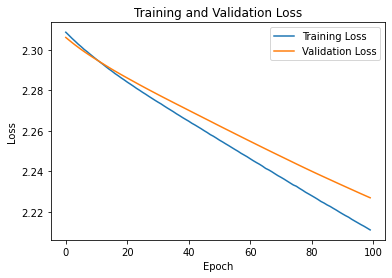

In [47]:
epochs_ran = len(loss['train'])
print(epochs_ran)
print(epochs_ran == len(loss['valid']))
print(epochs_ran == len(acc['train']))

plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(loss['train'], label="Training Loss")
plt.plot(loss['valid'], label = "Validation Loss")
plt.legend()

#### Graph the Training & Validation Accuracy

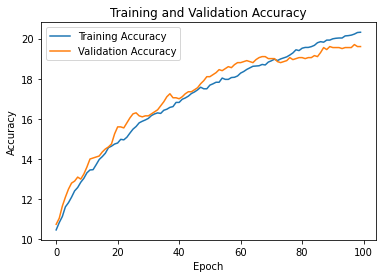

In [26]:
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.plot(acc['train'], label="Training Accuracy")
plt.plot(acc['valid'], label = "Validation Accuracy")
plt.legend()

#### Reporting Testing Loss and Accuracy

In [27]:
test_loss, test_acc = run_model(dog_model,running_mode='test', train_set=train_set, test_set = test_set, valid_set=val_set,batch_size=10,
        n_epochs=100, learning_rate=1e-5)
print(f'Loss {test_loss}')
print(f'acc {test_acc}')

Loss 2.223356938787869
acc 18.21428571428571


## Convolutional layers 

#### Instantiating a Model and Training it
You may want to edit run_model to print out the epochs for this section

In [43]:
model = Dog_Classifier_Conv(kernel_size=[(5,5),(3,3)], stride=[(1,1),(1,1)])
model1, loss1, acc1 = run_model(model,running_mode='train', train_set=train_set, test_set = test_set, valid_set=val_set,batch_size=10,
        n_epochs=100, learning_rate=1e-5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


#### Graphs

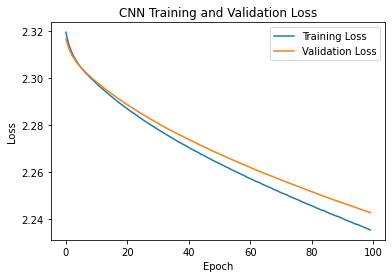

In [44]:
# Don't forget to label the x and y axis
plt.title('CNN Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(loss1['train'], label="Training Loss")
plt.plot(loss1['valid'], label = "Validation Loss")
plt.legend()



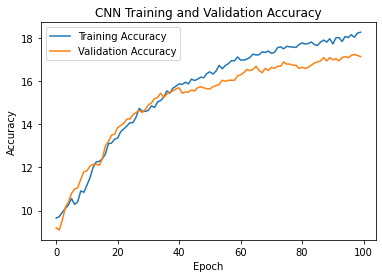

In [45]:
plt.title('CNN Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.plot(acc1['train'], label="Training Accuracy")
plt.plot(acc1['valid'], label = "Validation Accuracy")
plt.legend()

#### Reporting Testing Loss and Accuracy

In [46]:
test_loss, test_acc = run_model(model1,running_mode='test', train_set=train_set, test_set = test_set, valid_set=val_set,batch_size=10,
        n_epochs=100, learning_rate=1e-5)
print(f'Loss {test_loss}')
print(f'acc {test_acc}')

Loss 2.2565113646643504
acc 16.42857142857142


## Digging more deeply into convolutional networks

Now try doing this last section on your own, here are some useful keyboard shortcuts while using jupyter

* dd - delete a cell
* a - new cell above
* b - new cell below
* shift + enter - run current cell and move to next cell
* ctrl + enter - run current cell 